# <center>Assignment 6</center>

Name : Viraj Patil

PRN  : 230940128038

In [1]:
import string
import re
from os import listdir
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
# from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D
import numpy as np
import nltk

2023-12-19 21:02:51.810230: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 21:02:51.810269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 21:02:51.811000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 21:02:51.815315: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 21:02:52.518517: W tensorflow/compiler/tf2

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# !pip install gdown

In [5]:
file_id = '1gELRK1Lu64dIOVF4QwqfyWIKcLqFnbyY'
output_file = "ecommerceDatasetNLP.csv"

In [6]:
# import gdown

In [7]:

# gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

In [8]:
def clean_text(text):
    tokens1 = word_tokenize(text)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x for x in tokens2 if x not in stopwords.words('english')]
    tokens4 = []
    tags = pos_tag(tokens3)
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0], pos='n'))
        if word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0], pos='v'))
        if word[1].startswith('R'):
            tokens4.append(wnl.lemmatize(word[0], pos='r'))
        if word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0], pos='a'))

    return tokens4

In [9]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [10]:
wnl = WordNetLemmatizer()

In [11]:
gpus = tf.config.list_physical_devices('GPU')

try:
    for g in gpus:
        tf.config.experimental.set_memory_growth(g, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
except:
    print ('invalid device')

1 Phusical GPUs 1 Logical GPUs


2023-12-19 21:02:53.917853: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 21:02:53.952387: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-19 21:02:53.952653: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [12]:
df1 = pd.read_csv('ecommerceDatasetNLP.csv', header=None, names=['class','text'])
df1

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [13]:


df = df1.groupby('class').head(250).reset_index(drop = True)


In [14]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
995,Electronics,AmazonBasics Micro USB Charging Cable for Andr...
996,Electronics,AmazonBasics Micro USB Charging Cable for Andr...
997,Electronics,AmazonBasics Micro USB Charging Cable for Andr...
998,Electronics,AmazonBasics Micro USB Charging Cable for Andr...


In [15]:
df['class'].value_counts()

class
Household                 250
Books                     250
Clothing & Accessories    250
Electronics               250
Name: count, dtype: int64

In [16]:
df['class'].value_counts()

class
Household                 250
Books                     250
Clothing & Accessories    250
Electronics               250
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='class'>

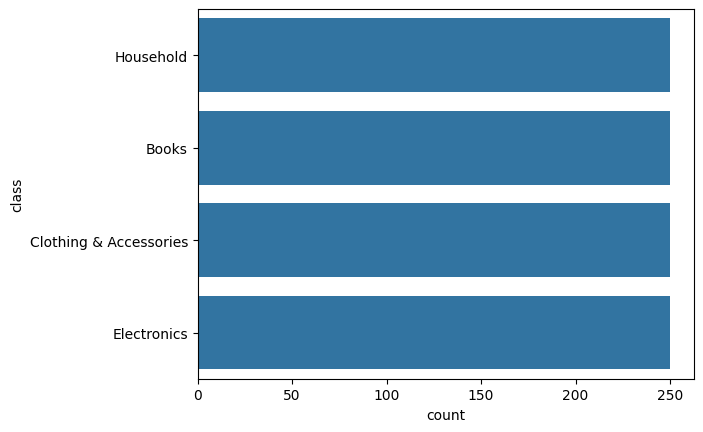

In [17]:
sns.countplot(y=df['class'])

In [18]:
df.isnull().sum()

class    0
text     0
dtype: int64

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

class    0
text     0
dtype: int64

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
df['text'].apply(lambda x: clean_text(x))

0      [paper, plane, design, frame, wall, hang, moti...
1      [saf, frame, paint, wood, inch, x, inch, speci...
2      [saf, textured, modern, art, print, frame, pai...
3      [saf, flower, print, frame, paint, synthetic, ...
4      [incredible, gift, india, wooden, happy, birth...
                             ...                        
995    [amazonbasics, micro, usb, charge, cable, andr...
996    [amazonbasics, micro, usb, charge, cable, andr...
997    [amazonbasics, micro, usb, charge, cable, andr...
998    [amazonbasics, micro, usb, charge, cable, andr...
999    [boat, rugged, braid, micro, usb, cable, mysti...
Name: text, Length: 1000, dtype: object

In [22]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
995,Electronics,AmazonBasics Micro USB Charging Cable for Andr...
996,Electronics,AmazonBasics Micro USB Charging Cable for Andr...
997,Electronics,AmazonBasics Micro USB Charging Cable for Andr...
998,Electronics,AmazonBasics Micro USB Charging Cable for Andr...


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,class,text
0,3,Paper Plane Design Framed Wall Hanging Motivat...
1,3,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,3,SAF 'UV Textured Modern Art Print Framed' Pain...
3,3,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,3,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
995,2,AmazonBasics Micro USB Charging Cable for Andr...
996,2,AmazonBasics Micro USB Charging Cable for Andr...
997,2,AmazonBasics Micro USB Charging Cable for Andr...
998,2,AmazonBasics Micro USB Charging Cable for Andr...


In [24]:
y = df['class']
y

0      3
1      3
2      3
3      3
4      3
      ..
995    2
996    2
997    2
998    2
999    2
Name: class, Length: 1000, dtype: int64

In [25]:
x = df['text']
x

0      Paper Plane Design Framed Wall Hanging Motivat...
1      SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2      SAF 'UV Textured Modern Art Print Framed' Pain...
3      SAF Flower Print Framed Painting (Synthetic, 1...
4      Incredible Gifts India Wooden Happy Birthday U...
                             ...                        
995    AmazonBasics Micro USB Charging Cable for Andr...
996    AmazonBasics Micro USB Charging Cable for Andr...
997    AmazonBasics Micro USB Charging Cable for Andr...
998    AmazonBasics Micro USB Charging Cable for Andr...
999    boAt Rugged V3 Braided Micro USB Cable (Mystic...
Name: text, Length: 1000, dtype: object

In [26]:
# x_vect = tfidf.fit_transform(df['text'])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, stratify= y, test_size=0.25)

In [28]:
x_train.shape, x_test.shape

((750,), (250,))

In [29]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove puctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove reamaning tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [30]:
# define the model
def define_model(vocab_size):
  # define network
  model = Sequential()
  # model.add(Embedding(vocab_size, 100, input_length=max_length))
  model.add(Dense(vocab_size, activation = 'relu'))
  model.add(Dense(100, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1,  activation = 'softmax'))
  # compile network
  model.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [31]:
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [32]:
# create the tokenizer
tokenizer = create_tokenizer(x_train)

In [33]:
# enocde data
x_train = tokenizer.texts_to_matrix(x_train, mode = 'binary')
x_train.shape

(750, 8587)

In [34]:
x_test = tokenizer.texts_to_matrix(x_test, mode = 'binary')
x_test.shape

(250, 8587)

In [35]:
y_train

418    0
39     3
63     3
945    2
887    2
      ..
789    2
104    3
904    2
183    3
456    0
Name: class, Length: 750, dtype: int64

In [36]:
# define network
n_words = x_train.shape[1]
model = define_model(n_words)

In [37]:
n_words = x_train.shape[1]
n_words

8587

In [38]:
# prompt: define model for predicting class

model = define_model(n_words)


In [39]:
model.fit(x_train, np.array(y_train), epochs = 10, batch_size=10)

Epoch 1/10


/home/user/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
2023-12-19 21:03:03.315866: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-19 21:03:03.384597: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f547d6f24f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-19 21:03:03.384644: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-12-19 21:03:03.389202: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `

75/75 [==============================] - 4s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 2/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 3/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 4/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 5/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 6/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 7/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 8/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 9/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00 - accuracy: 0.2493
Epoch 10/10
75/75 [==============================] - 3s 37ms/step - loss: 0.0000e+00

In [40]:
# summerize defined model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (10, 8587)                73745156  
                                                                 
 dense_5 (Dense)             (10, 100)                 858800    
                                                                 
 dense_6 (Dense)             (10, 10)                  1010      
                                                                 
 dense_7 (Dense)             (10, 1)                   11        
                                                                 
Total params: 74604977 (284.60 MB)
Trainable params: 74604977 (284.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


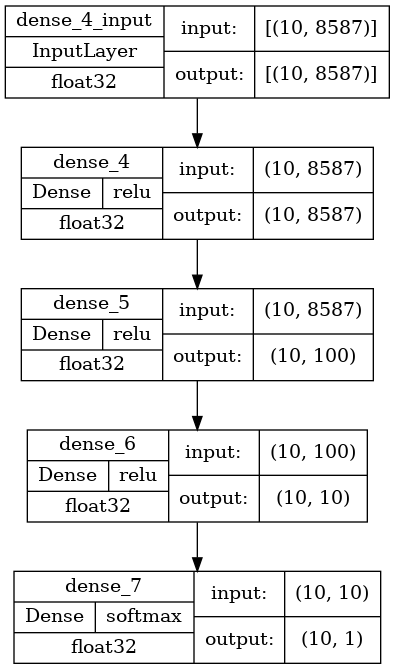

In [41]:
plot_model(model, show_dtype=True, show_layer_activations = True, show_shapes = True, show_layer_names=True)

In [42]:
model.evaluate(x_test,np.array(y_test), batch_size=1)

 30/250 [==>...........................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2333   

/home/user/anaconda3/envs/NLP/lib/python3.11/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(1, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


250/250 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2520


[0.0, 0.25200000405311584]

In [43]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie.'
text3 = 'This is a best movie'
text4 = 'The acting was bad in this movie'

In [44]:
def predict(text):
  tokens = clean_doc(text)
  text = " ".join(tokens)
  x_test = tokenizer.texts_to_matrix([text], mode = 'binary')
  prediction = model.predict(x_test)
  if prediction >= 0.5:
    return 'Positive'
  else:
     return 'Negative'

In [45]:
predict(text1)

1/1 [==============================] - 0s 58ms/step


'Positive'

In [46]:
predict(text2)

1/1 [==============================] - 0s 15ms/step


'Positive'

In [47]:
predict(text3)

1/1 [==============================] - 0s 15ms/step


'Positive'

In [48]:
predict(text4)

1/1 [==============================] - 0s 15ms/step


'Positive'

In [49]:
# classify a review a negative or positive
def predict_sentiment(review):
  #clean
  tokens = clean_doc(review)
  # Convert to line
  line = ' '.join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode = 'binary')
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrieve predicted percentage and lable
  percent_pos = yhat[0 ,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, "POSITIVE"

In [50]:
percent, sentiment = predict_sentiment(text1)
print('Review: [%s]\n Sentiment: %s (%.3f%%)' % (text1, sentiment, percent))

Review: [Best movie ever! It was great, I will definitely recommend it.]
 Sentiment: POSITIVE (1.000%)


In [51]:
percent, sentiment = predict_sentiment(text2)
print(f'Review: [{text1}]\n Sentiment: {sentiment} ({percent:.3f}%)')

Review: [Best movie ever! It was great, I will definitely recommend it.]
 Sentiment: POSITIVE (1.000%)


In [52]:
predict_sentiment(text3)

(1.0, 'POSITIVE')

In [53]:
predict_sentiment(text4)

(1.0, 'POSITIVE')